In [1]:
#Import packages


import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

path = "../input/basketball/" #Everything preceding the file name
database = path + 'basketball.sqlite' #The path + the file name

In [2]:
pip install kaleido

     |████████████████████████████████| 79.9 MB 163 kB/s 
Note: you may need to restart the kernel to use updated packages.


## Overview of Data

Connect to the database and get a list of the tables within it.

In [3]:
# sqlite3.connect() Creates a connection object
# database is the variable we established above
conn = sqlite3.connect(database)

#pd.read_sql() is a retrieve function that retrieves what we put in the parenthesis

#After SELECT, put what you want to see. In this case we put *, which means see everything

#After FROM choose a source
    # sqlite_master is an internal table that is present in all SQLite databases. The content of this table describes the database's schema.
    
#After WHERE specify a condiction
    # condition here is where type = table
    
#End with a ";" and close the quotation marks

# conn is our connection object

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,"CREATE TABLE ""Player"" (\n""id"" TEXT,\n ""full_n..."
1,table,Team,Team,4,"CREATE TABLE ""Team"" (\n""id"" TEXT,\n ""full_nam..."
2,table,Team_Attributes,Team_Attributes,5,"CREATE TABLE ""Team_Attributes"" (\n""ID"" TEXT,\n..."
3,table,Team_History,Team_History,6,"CREATE TABLE ""Team_History"" (\n""ID"" TEXT,\n ""..."
4,table,Player_Attributes,Player_Attributes,15,"CREATE TABLE ""Player_Attributes"" (\n""ID"" TEXT,..."
5,table,Game_Officials,Game_Officials,8375,"CREATE TABLE ""Game_Officials"" (\n""OFFICIAL_ID""..."
6,table,Game_Inactive_Players,Game_Inactive_Players,8997,"CREATE TABLE ""Game_Inactive_Players"" (\n""PLAYE..."
7,table,Team_Salary,Team_Salary,13415,CREATE TABLE `Team_Salary` (\n `nameTeam` TEX...
8,table,Player_Salary,Player_Salary,23558,CREATE TABLE `Player_Salary` (\n `slugSeason`...
9,table,Draft,Draft,23559,"CREATE TABLE `Draft` (\n `yearDraft` REAL,\n ..."


#### Look at Tables Individually to Plan Analysis  

Let's take a look at the following tables:  
1. Player  
3. Draft  
4. Player_Bios  
5. Player_Photos

In [4]:
# Look at active players in the Player table
    # 519 Players

Active_Player = pd.read_sql("""SELECT *
                        FROM Player
                        WHERE is_active=1; """, conn)


Active_Player 

,id,full_name,first_name,last_name,is_active
0,203500,Steven Adams,Steven,Adams,1
1,1628389,Bam Adebayo,Bam,Adebayo,1
2,200746,LaMarcus Aldridge,LaMarcus,Aldridge,1
3,1629734,Kyle Alexander,Kyle,Alexander,1
4,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,1
...,...,...,...,...,...
514,201152,Thaddeus Young,Thaddeus,Young,1
515,1629027,Trae Young,Trae,Young,1
516,203469,Cody Zeller,Cody,Zeller,1
517,1627790,Ante Zizic,Ante,Zizic,1


In [5]:
# Look at draft table
    # Gives us relevant information about drafted players, such as the year they were drafted, the pick they were drafted with, and the team that drafted them
    
Draft = pd.read_sql("""SELECT *
                        FROM Draft ; """, conn)


Draft

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,cityTeam,teamName,PLAYER_PROFILE_FLAG,slugOrganizationTypeFrom,locationOrganizationFrom
0,2020.0,1.0,1.0,1.0,Anthony Edwards,MIN,Georgia,College/University,1630162.0,1.610613e+09,Minnesota Timberwolves,Minnesota,Timberwolves,1.0,COL,None
1,2020.0,2.0,1.0,2.0,James Wiseman,GSW,Memphis,College/University,1630164.0,1.610613e+09,Golden State Warriors,Golden State,Warriors,1.0,COL,None
2,2020.0,3.0,1.0,3.0,LaMelo Ball,CHA,Illawarra,Other Team/Club,1630163.0,1.610613e+09,Charlotte Hornets,Charlotte,Hornets,1.0,PRO,Australia
3,2020.0,4.0,1.0,4.0,Patrick Williams,CHI,Florida State,College/University,1630172.0,1.610613e+09,Chicago Bulls,Chicago,Bulls,1.0,COL,None
4,2020.0,5.0,1.0,5.0,Isaac Okoro,CLE,Auburn,College/University,1630171.0,1.610613e+09,Cleveland Cavaliers,Cleveland,Cavaliers,1.0,COL,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,1949.0,6.0,1.0,6.0,Ron Livingstone,BAL,Wyoming,College/University,77392.0,1.610610e+09,Baltimore Bullets,Baltimore,Bullets,1.0,COL,None
7886,1949.0,7.0,1.0,7.0,Dick McGuire,NYK,St. John's (NY),College/University,77537.0,1.610613e+09,New York Knicks,New York,Knicks,1.0,COL,None
7887,1949.0,8.0,1.0,8.0,Wallace Jones,WAS,Kentucky,College/University,77199.0,1.610610e+09,Washington Capitols,Washington,Capitols,1.0,COL,None
7888,1949.0,9.0,1.0,9.0,Jack Kerris,CHS,Loyola-Chicago,College/University,77249.0,1.610610e+09,Chicago Stags,Chicago,Stags,1.0,COL,None


In [6]:
# Look at Player_Attributes table
    # Contains physical and positional attributes of each player along with background information such as alma mater.
    
Attributes = pd.read_sql("""SELECT *
                        FROM Player_Attributes; """, conn)


Attributes

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04T00:00:00,,Croatia,...,Y,Y,2016,1,23,6.0,0.6,3.9,0.0,NaN
4496,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30T00:00:00,Kent State,USA,...,Y,Y,Undrafted,Undrafted,Undrafted,0.3,0.1,1.1,0.0,NaN
4497,78648,Bill,Zopf,Bill Zopf,"Zopf, Bill",B. Zopf,bill-zopf,1948-06-07T00:00:00,Duquesne,USA,...,Y,Y,1970,2,33,2.2,1.4,0.9,0.0,NaN
4498,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,Croatia,...,Y,Y,2016,2,32,8.5,1.1,7.0,NaN,0.126


In [7]:
# Look at Player_Photos table
    # Contains links to photos of the players
    
Photos = pd.read_sql("""SELECT *
                        FROM Player_Photos ; """, conn)


Photos

,isActive,isRookie,namePlayer,idPlayer,countSeasons,yearSeasonFirst,yearSeasonLast,idTeam,hasGamesPlayedFlag,urlPlayerStats,urlPlayerThumbnail,urlPlayerHeadshot,urlPlayerActionPhoto,hasHeadShot,hasThumbnail,hasAction,urlPlayerPhoto
0,0,0,Alaa Abdelnaby,76001.0,4.0,1990.0,1994.0,NaN,0,https://stats.nba.com/player/76001,https://stats.nba.com/media/players/230x185/76...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/76001.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/76...
1,0,0,Zaid Abdul-Aziz,76002.0,9.0,1968.0,1977.0,NaN,0,https://stats.nba.com/player/76002,https://stats.nba.com/media/players/230x185/76...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/76002.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/76...
2,0,0,Kareem Abdul-Jabbar,76003.0,19.0,1969.0,1988.0,NaN,0,https://stats.nba.com/player/76003,https://stats.nba.com/media/players/230x185/76...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/76003.png,1.0,1.0,1.0,https://ak-static.cms.nba.com/wp-content/uploa...
3,0,0,Mahmoud Abdul-Rauf,51.0,10.0,1990.0,2000.0,NaN,0,https://stats.nba.com/player/51,https://stats.nba.com/media/players/230x185/51...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/51.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/51...
4,0,0,Tariq Abdul-Wahad,1505.0,6.0,1997.0,2003.0,NaN,0,https://stats.nba.com/player/1505,https://stats.nba.com/media/players/230x185/15...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/1505.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/15...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,0,0,Ante Zizic,1627790.0,2.0,2017.0,2019.0,NaN,0,https://stats.nba.com/player/1627790,https://ak-static.cms.nba.com/wp-content/uploa...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/162779...,1.0,1.0,0.0,https://ak-static.cms.nba.com/wp-content/uploa...
4589,0,0,Jim Zoet,78647.0,0.0,1982.0,1982.0,NaN,0,https://stats.nba.com/player/78647,https://stats.nba.com/media/players/230x185/78...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/78647.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/78...
4590,0,0,Bill Zopf,78648.0,0.0,1970.0,1970.0,NaN,0,https://stats.nba.com/player/78648,https://stats.nba.com/media/players/230x185/78...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/78648.png,0.0,1.0,1.0,https://stats.nba.com/media/players/230x185/78...
4591,1,0,Ivica Zubac,1627826.0,4.0,2016.0,2020.0,1.610613e+09,0,https://stats.nba.com/player/1627826,https://stats.nba.com/media/players/230x185/16...,https://ak-static.cms.nba.com/wp-content/uploa...,https://stats.nba.com/media/players/700/162782...,1.0,1.0,1.0,https://ak-static.cms.nba.com/wp-content/uploa...


## Create Personalized Tables using Joins

As we can see above, we have a number of tables that we can leverage to create useful joined table:  

1. A table that shows information about when a players was drafted, such as what pick they were drafted with, which team drafted them, and the college they attended.    
2. A table that contains player attributes.
3. A table that includes a photo for each player.    

Furthermore, each of the above tables has a "Player ID" column that we can use to join the tables on. This is essential because over the course of the NBA's history, there have inevitably been a number of players with the same name. Merging on "Player ID" rather than name helps us address that problem.

**In the below analysis, we will leverage the "Player ID" column as in order to perform joins on the above 3 tables.**  



**Table 1: Player ID, Full player name, pick that player was drafted with, and player height**

In [8]:
pick_height = pd.read_sql("""SELECT 
                        Player_Attributes.ID AS Player_ID,
                        Player_Attributes.DISPLAY_FIRST_LAST AS Full_Name,
                        Draft.numberPickOverall AS Pick_Number_Overall,
                        Player_Attributes.Height AS Height
                        FROM Player_Attributes
                        JOIN Draft ON Player_Attributes.ID = Draft.idPlayer
                        ;""", conn)
pick_height

,Player_ID,Full_Name,Pick_Number_Overall,Height
0,76001,Alaa Abdelnaby,25.0,82.0
1,76002,Zaid Abdul-Aziz,5.0,81.0
2,76003,Kareem Abdul-Jabbar,1.0,86.0
3,51,Mahmoud Abdul-Rauf,3.0,73.0
4,1505,Tariq Abdul-Wahad,11.0,78.0
...,...,...,...,...
3309,1627757,Stephen Zimmerman,41.0,84.0
3310,1627835,Paul Zipser,48.0,80.0
3311,1627790,Ante Zizic,23.0,82.0
3312,78648,Bill Zopf,33.0,73.0


**Table 2: Player ID, full player name, year that player was drafted, player position, and a link to player headshot, isolated to players drafted after 2000 and sorted in descending order by draft year**

In [9]:
year_position_headshot = pd.read_sql("""SELECT 
                        Player_Attributes.ID AS Player_ID,
                        Player_Attributes.DISPLAY_FIRST_LAST AS Full_Name,
                        Draft.yearDraft AS Draft_Year,
                        Player_Attributes.Position AS Position,
                        Player_Photos.urlPlayerHeadshot AS Headshot
                        FROM Player_Attributes
                        JOIN Draft ON Player_Attributes.ID = Draft.idPlayer
                        LEFT JOIN Player_Photos on Player_Photos.idPlayer = Draft.idPlayer
                        WHERE Draft_Year > 2000
                        ORDER by Draft_Year DESC
                        ;""", conn)
year_position_headshot

,Player_ID,Full_Name,Draft_Year,Position,Headshot
0,1629638,Nickeil Alexander-Walker,2019.0,Guard,https://ak-static.cms.nba.com/wp-content/uploa...
1,1629628,RJ Barrett,2019.0,Forward-Guard,https://ak-static.cms.nba.com/wp-content/uploa...
2,1629647,Darius Bazley,2019.0,Forward-Guard,https://ak-static.cms.nba.com/wp-content/uploa...
3,1629048,Goga Bitadze,2019.0,Center-Forward,https://ak-static.cms.nba.com/wp-content/uploa...
4,1629626,Bol Bol,2019.0,Center-Forward,https://ak-static.cms.nba.com/wp-content/uploa...
...,...,...,...,...,...
977,2244,Jeff Trepagnier,2001.0,Guard,https://ak-static.cms.nba.com/wp-content/uploa...
978,2222,Gerald Wallace,2001.0,Forward,https://ak-static.cms.nba.com/wp-content/uploa...
979,2248,Earl Watson,2001.0,Guard,https://ak-static.cms.nba.com/wp-content/uploa...
980,2206,Rodney White,2001.0,Forward,https://ak-static.cms.nba.com/wp-content/uploa...


**Table 3: Player ID, full player name, player's draft year, player's previous organization, player birthdate, and a link to player stats, isolated to players drafted by the New York Knicks and sorted in ascending alphabetical order by previous organization name.**


In [10]:
Knicks_picks = pd.read_sql("""SELECT 
                        Player_Attributes.ID AS Player_ID,
                        Player_Attributes.DISPLAY_FIRST_LAST AS Full_Name,
                        Draft.yearDraft AS Draft_Year,
                        Draft.nameOrganizationFrom AS Previous_Organization,
                        Player_Attributes.BIRTHDATE AS Birthdate,
                        Player_Photos.urlPlayerStats as Stats
                        FROM Player_Attributes
                        JOIN Draft ON Player_Attributes.ID = Draft.idPlayer
                        LEFT JOIN Player_Photos on Player_Photos.idPlayer = Draft.idPlayer
                        WHERE Draft.idTeam = 1610612752
                        ORDER by Previous_Organization ASC;""", conn)
Knicks_picks

,Player_ID,Full_Name,Draft_Year,Previous_Organization,Birthdate,Stats
0,1629011,Mitchell Robinson,2018.0,None,1998-04-01T00:00:00,https://stats.nba.com/player/1629011
1,78385,Bill Turner,1966.0,Akron,1944-02-18T00:00:00,https://stats.nba.com/player/78385
2,76553,Larry Demic,1979.0,Arizona,1957-06-27T00:00:00,https://stats.nba.com/player/76553
3,101112,Channing Frye,2005.0,Arizona,1983-05-17T00:00:00,https://stats.nba.com/player/101112
4,201941,Jordan Hill,2009.0,Arizona,1987-07-27T00:00:00,https://stats.nba.com/player/201941
...,...,...,...,...,...,...
157,77637,Ron Moore,1987.0,West Virginia State,1962-01-16T00:00:00,https://stats.nba.com/player/77637
158,78380,Jack Turner,1954.0,Western Kentucky,1930-06-29T00:00:00,https://stats.nba.com/player/78380
159,77868,Ralph Polson,1952.0,Whitworth,1929-10-26T00:00:00,https://stats.nba.com/player/77868
160,203921,Cleanthony Early,2014.0,Wichita State,1991-04-17T00:00:00,https://stats.nba.com/player/203921


## Performing Simple Analytics Using Aggregation

Above, we practiced using joins to create personalized tables of interest.   
Using aggregation, we can also perform basic analytics on the data in our database to draw insights.

**Aggregated Table 1:**   
1. How many times has each team drafted a player (sorted in ascending order)?

In [11]:
Team_Picks = pd.read_sql("""SELECT 
                            Draft.nameTeam AS Team_Name,
                            COUNT(idPlayer) AS Number_of_Picks
                            FROM Draft
                            GROUP BY idTeam
                            ORDER BY Number_of_Picks ASC
                            Limit 10;""", conn)

Team_Picks

,Team_Name,Number_of_Picks
0,Providence Steamrollers,9
1,St. Louis Bombers,10
2,Chicago Stags,13
3,Washington Capitols,15
4,New Orleans Pelicans,33
5,Indianapolis Olympians,36
6,Toronto Raptors,40
7,Memphis Grizzlies,47
8,Miami Heat,58
9,Charlotte Hornets,60


The Providence Steamrollers have drafted the least players (9), while the Atlanta Hawks have drafted the most players (514).

**Aggregated Table 2:**   
1. Which 10 teams have the highest average salary for this season and the 5 seasons after (sorted in descending order)?   
2. Left Join the top 10 highest salaried teams with the number of players the team has drafted in its history.**

In [12]:
Average_Salary = pd.read_sql("""SELECT 
                            Draft.nameTeam AS Team_Name,
                            Avg(Team_Salary.[X2020-21]+Team_Salary.[X2021-22]) AS Average_Salary,
                            COUNT(Draft.idPlayer) AS Number_of_Picks
                            FROM Team_Salary
                            LEFT JOIN Draft on Team_Salary.nameTeam = Draft.nameTeam
                            GROUP BY idTeam
                            ORDER BY Average_Salary DESC
                            Limit 10;""", conn)

Average_Salary

,Team_Name,Average_Salary,Number_of_Picks
0,Brooklyn Nets,334836819.0,16
1,Golden State Warriors,330573807.0,230
2,Los Angeles Clippers,282898895.0,82
3,Milwaukee Bucks,278821035.0,267
4,Philadelphia 76ers,276561380.0,364
5,Utah Jazz,266446024.0,150
6,Boston Celtics,264110511.0,450
7,Portland Trail Blazers,262969420.0,273
8,Minnesota Timberwolves,261546043.0,77
9,Los Angeles Lakers,258321235.0,304


The Brooklyn Nets have both the highest average salary and the lowest number of players drafted.

**Aggregated Table 3:**
1. Which draft combine year had the highest average player height?
2. What were average wingspans per year?
3. How many centers were in that draft? This may be an indicator of player height because center is, historically, the tallest position.  
4. Order these results in descending order by average height.

In [13]:
Height_Centers = pd.read_sql("""SELECT 
                            Draft_Combine.yearCombine as Combine_Year,
                            AVG(Draft_Combine.heightWOShoesInches) As Average_Height_Inches,
                            AVG(Draft_Combine.wingspanInches) As Average_Wingspan_Inches,
                            SUM(CASE WHEN Draft_Combine.slugPosition = 'C' OR 'PF-C' THEN 1 ELSE 0 END) AS Count_Centers
                            FROM Draft_Combine
                            GROUP BY Combine_Year
                            ORDER BY Average_Height_Inches DESC
                            ;""", conn)

Height_Centers

,Combine_Year,Average_Height_Inches,Average_Wingspan_Inches,Count_Centers
0,2011,78.456731,83.576923,6
1,2002,78.330128,83.115385,11
2,2004,78.307692,82.836538,2
3,2013,77.971311,82.672131,3
4,2017,77.866071,82.839286,5
5,2018,77.686508,82.761905,6
6,2003,77.661585,81.984756,5
7,2020,77.653571,82.621429,8
8,2005,77.604430,82.398734,5
9,2014,77.471774,82.087302,8


So there does not seem to be a positive correlation between number of centers and average height by combine. However, there is, unsurprisingly, a clear correlation betwen average height and average wingspan by combine.

## Visualizing Trends in our data

**Visualization 1**  
Top 10 Highest Paying NBA Teams by Average Salary (2020-26) using Plotly.

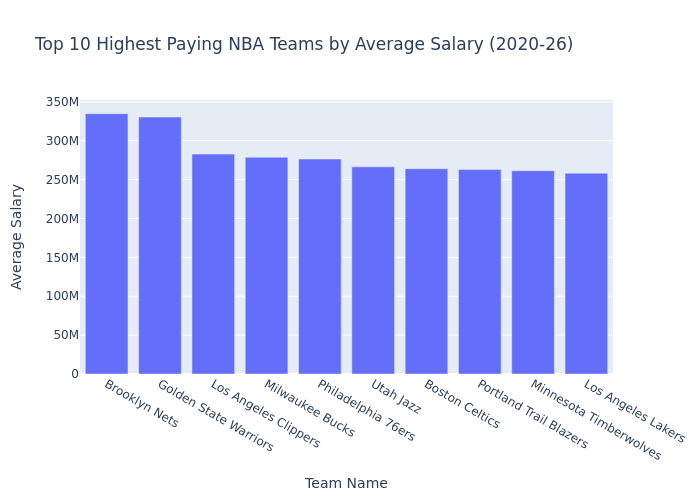

In [14]:
fig = px.bar(Average_Salary, x= 'Team_Name', y= 'Average_Salary', 
             title="Top 10 Highest Paying NBA Teams by Average Salary (2020-26)",
             labels=dict(Team_Name="Team Name", Average_Salary= "Average Salary" ))
fig.show("png")

**Visualization 2**  
Histplot visualization of the number of players at each height using Seaborn.

Text(0.5, 1.0, 'Count of Players by Height')

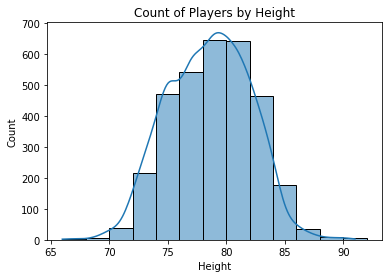

In [15]:
sns.histplot(pick_height.Height, kde=True, binwidth = 2, bins = 30).set_title('Count of Players by Height')

**Visualization 3**  
Scatterplot visualization of the correlation between height and wingspan for draft combine player using Plotly.

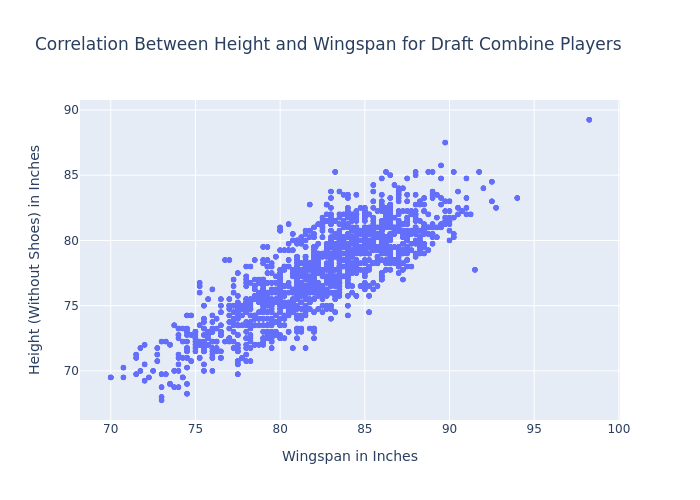

In [16]:
Height_Wingspan = pd.read_sql("""SELECT 
                            Draft_Combine.heightWOShoesInches,
                            Draft_Combine.wingspanInches
                            FROM Draft_Combine
                            ;""", conn)

fig = px.scatter(Height_Wingspan, y="heightWOShoesInches", x="wingspanInches",
           title="Correlation Between Height and Wingspan for Draft Combine Players",
           labels=dict(heightWOShoesInches="Height (Without Shoes) in Inches", wingspanInches= "Wingspan in Inches" ))
fig.show("png")

## Review

In this notebook, we:   

1. Connected to the database  
2. Learned about our data in order to plan our analysis  
3. Used joins to create personalized tables  
4. Performed simple analytics on our data  
5. Visualized trends within our data.  

Hopefully this served as a useful introduction to SQL analysis. Thanks for reading!